In [1]:
# -q (quests) 옵션은 설치 로그를 안 보여줌(조용히 함

# -q (quiet) 옵션은 설치 로그를 안보여줌(조용히함)
%pip install -q seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# 타이타닉 데이터셋 불러오기
# (pandas에 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

In [3]:
# col 결측치 합계

titanic.isna().sum()

# 승객 등급 등장 빈도 (1,2,3 emdtjr)

titanic['pclass'].value_counts()

# 성별 빈도 (남/녀)

titanic['sex'].value_counts()

# 생존 여부 빈도 (생존자/사망자)

titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [4]:
# 성별에 따른 생존율

titanic.groupby('sex')['survived'].mean()

# 더 복잡한 통계 가능
titanic.groupby('sex').agg({'survived':['mean']})

# 승객 등급에 따른 생존율
titanic.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [5]:
# 성별 & 승객 등급에 따른 생존 # 왠지 view가 필요해보인다.

titanic.groupby(['sex','pclass'])['survived'].mean()

# 피벗테이블
titanic.pivot_table(
    values='survived',
    index='sex',
    columns='pclass',
    aggfunc='mean'
)

# 나이 그룹별 생존율

titanic['age_group'] = pd.cut( # [key-value 변경]
    titanic['age'],
    bins=[0,12,18,35,60,100], # 초과 ~이하 
    labels=['아동','청소년','청년','중장년','노년']
)

titanic.head(3)

# 카테고리가 있는데, 해당되는 내용이 없을 때 표시 유무(보인다/안 보인다) observed 옵셥
print(titanic.groupby('age_group',observed=False)['survived'].mean())

# 성별 + 나이 그룹으로 생종율 확인

titanic.groupby(['sex','age_group'])['survived'].mean


titanic.pivot_table(
    values='survived',
    index='sex',
    columns='age_group',
    aggfunc='mean'
)

age_group
아동     0.579710
청소년    0.428571
청년     0.382682
중장년    0.400000
노년     0.227273
Name: survived, dtype: float64


/var/folders/1p/yb8d7hmx6wd564h57_td4k140000gn/T/ipykernel_26138/186374164.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex','age_group'])['survived'].mean


age_group,아동,청소년,청년,중장년,노년
sex,,,,,
female,0.593750,0.750000,0.783333,0.771429,1.000000
male,0.567568,0.088235,0.180672,0.192000,0.105263


# 결측치 처리

In [ ]:
from dataclasses import MISSING


titanic = sns.load_dataset('titanic')
# 결측치 확인
missing = titanic.isna().sum()

# 결측 있는 항목만 확인
missing[missing>0]


# 결측 비율
missing_p = titanic.isna().mean() * 100
missing_p[missing_p > 0]


age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [6]:
# 결측치 채우기, 가정과 전략
# age: 중요한 정보  가정하기 : 평균/중앙값 대체 '전략 수립'
# embarked : '전략 수립' 가장 많은 사람들이 탄 곳으로 가정 
# deck : 추측 불가능 또는 의미 없음 -> 삭제 '전략 수립'

# 필요하다면, Copy 떠서 진행 



titanic_processed = titanic.copy()

mean_age = titanic['age'].mean()

# 비어 있던 행 마스킹
age_mask = titanic['age'].isna()

# 나이 결측치 재확인
titanic_processed['age'] = titanic_processed['age'].fillna(mean_age) # inplace ???

# 결측치 있는지 재확인
titanic_processed.isna().sum()

# 평균으로 채워진 값들만 확인
titanic_processed.loc[age_mask]










,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
17,1,2,male,29.699118,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,NaN
19,1,3,female,29.699118,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,NaN
26,0,3,male,29.699118,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,NaN
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,29.699118,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,NaN
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,NaN
868,0,3,male,29.699118,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True,NaN
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,NaN


# 전체 평균으로 대체하는게 옳을까...?
# 성별/객실별로 평균을 추정하는건 어떨까?

# 객실등급은 결측치가 없어서 좋다. 더 좋

In [7]:
# 성별/객실별로 평균을 추정하는건 어떨까?



# 모든 사람들을 성별/객실 그룹의 평균 나이로 바꾼 Series 
mean_ages = titanic.groupby(['sex','pclass'])['age'].transform('mean')

# titanic의 age col 중 빈 값만, mean_ages로 채움.
titanic_processed['age'] = titanic['age'].fillna(mean_ages)

# 원래 비어있던 애들만 확인 
titanic_processed.loc[ titanic['age'].isna() ]



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
5,0,3,male,26.507589,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN
17,1,2,male,30.740707,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True,NaN
19,1,3,female,21.750000,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True,NaN
26,0,3,male,26.507589,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True,NaN
28,1,3,female,21.750000,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,26.507589,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,NaN
863,0,3,female,21.750000,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,NaN
868,0,3,male,26.507589,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True,NaN
878,0,3,male,26.507589,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,NaN


In [8]:
# embarked (탑승 도시) -> 최빈값 (가장 많이 탄 곳)

# 비어 있는 항구 개수
titanic['embarked'].isna().sum()

# 최빈값 (Series  - 벡터 = 값이 중복 2개일 수 있으니깐 )
type(titanic['embarked'].mode())

mode_embarked = titanic['embarked'].mode()[0] # Series에서 1개 뽑기

titanic_processed['embarked'] = titanic['embarked'].fillna(mode_embarked)

# 처리 완료 학인 (빈값 0개)

titanic_processed['embarked'].isna().sum()



# 결측치 0 ! 성공 ! 


0

In [12]:
# deck은 77%가 비어있음 -> 삭제

# titanic['deck'].isna().mean() * 100 # 빈 값 비율

# 'deck' 컬럼을 삭제, inplace실행하면 진짜 바뀐거라 같은 코드 실행하면 오류 나옴
# titanic_processed = titanic.drop('deck',axis=1,inplace=True)

titanic_processed.info() # 무언가가 덮어씌어진 것 같다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_group    714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


## 타이타닉 이상치 처리


내 낙서장

titanic은 데이터프레임 아마도 원본 아닐까?

titanic_processed = titanic.copy() 

titanic_processed는 카피인데 결국에 같은 데이터프레임이겠지

In [18]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 수치 데이터에만 집중
numeric_cols = ['age', 'fare']
print("타이타닉 데이터셋 기본 정보:")
print(titanic[numeric_cols].describe())

타이타닉 데이터셋 기본 정보:
              age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200


In [41]:
# 결측치(Missing Value) 처리 (이전에 배운 내용 활용)

titanic_processed.isna()

titanic_processed.isna().sum() # age_group      177 deck           688





survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_group      177
dtype: int64

In [ ]:
# 성별/객실 그룹의 평균 나이로 결측치 채우기

## 성별/객실 그룹의 평균 나이 구하기

titanic_processed_groupby = titanic_processed.groupby(['sex','pclass'])['age'].mean()


## 채우기 

# titanic_processed['age'] = titanic_processed['age'].fillna(titanic_processed_groupby) # ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'
## .transform('mean') ??? 일괄 변경

# 각 승객 의 그룹에 맞춰서 성별 + 객실등급 해당 그룹으로 일괄 변경

mean_ages =titanic_processed.groupby(['sex','pclass'])['age'].transform('mean')




ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

In [ ]:
from numpy import std 
from scipy import stats # from scipy import stats (과학적 기술적 계산을 위한 라이브러리 Numpy 기반)

# 나이 확인
age_series = titanic_processed['age']

# z_score = age_series - age_series.mean() / age_series.std()

z_scores = stats.zscore(age_series)

print(z_scores)

# z_score를 뽑아서 얘를 이용해서 결측치인 애와 아닌 애를 찾아야 하는 것 아닌가? 아 이간 결측치가 아니라 이상치 탐지인가?

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

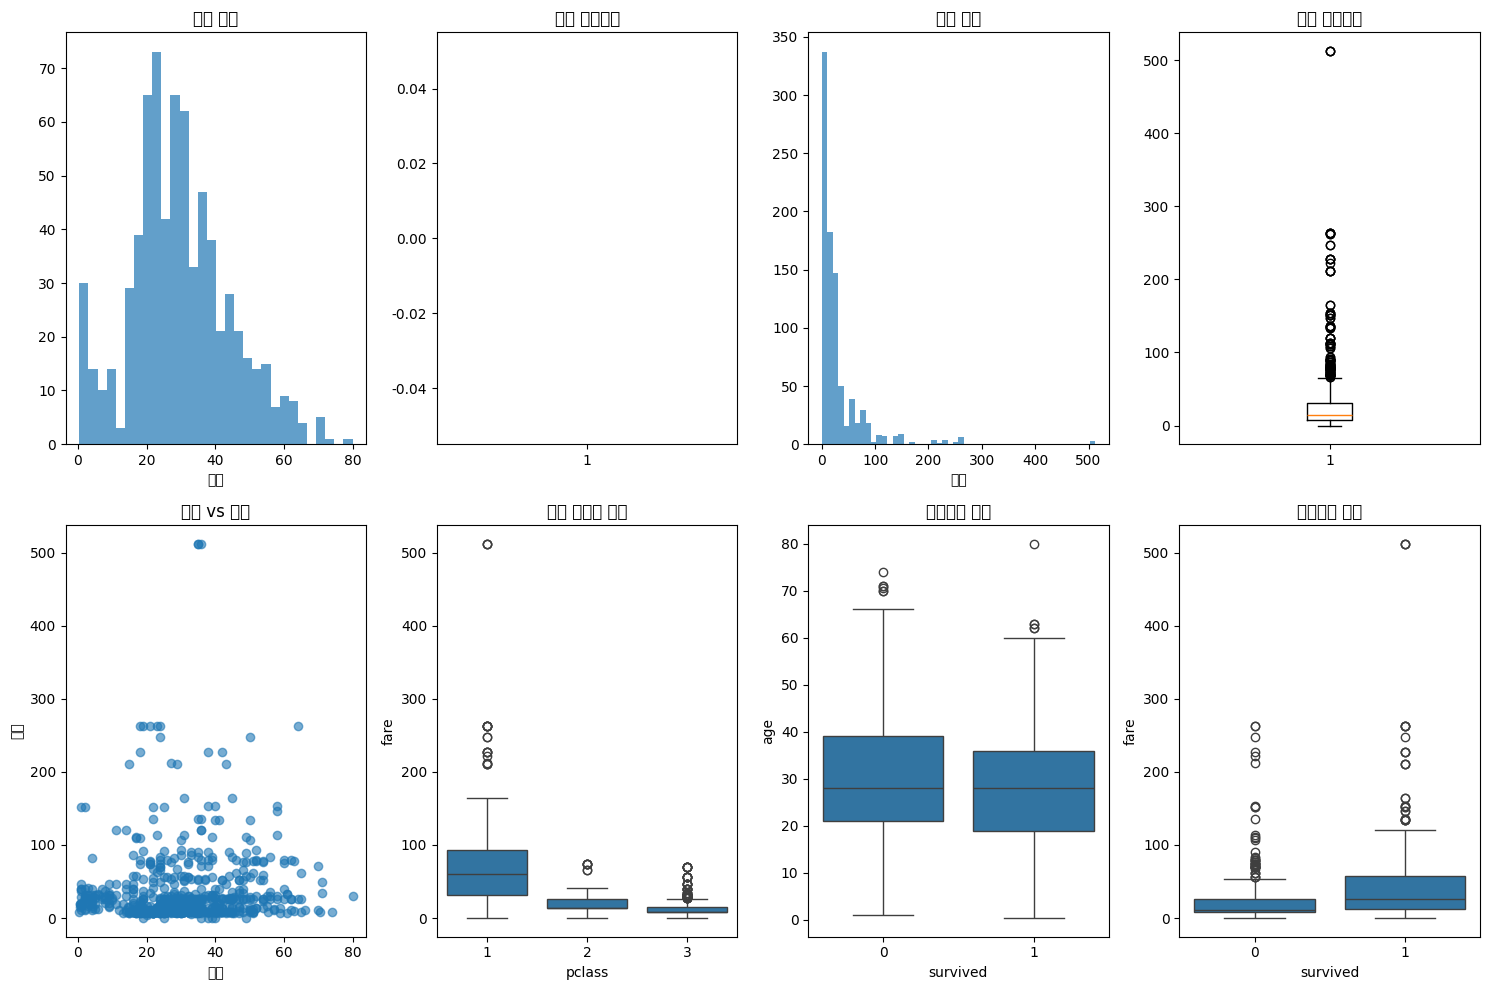

In [19]:
# 결측치 처리 안하면 제대로 시각화 제대로 안나옴

# 1. 이상치 탐지 및 시각화
plt.figure(figsize=(15, 10))

# 나이 분포
plt.subplot(2, 4, 1)
plt.hist(titanic['age'], bins=30, alpha=0.7)
plt.title('나이 분포')
plt.xlabel('나이')

plt.subplot(2, 4, 2)
plt.boxplot(titanic['age'])
plt.title('나이 박스플롯')

# 요금 분포
plt.subplot(2, 4, 3)
plt.hist(titanic['fare'], bins=50, alpha=0.7)
plt.title('요금 분포')
plt.xlabel('요금')

plt.subplot(2, 4, 4)
plt.boxplot(titanic['fare'])
plt.title('요금 박스플롯')

# 산점도
plt.subplot(2, 4, 5)
plt.scatter(titanic['age'], titanic['fare'], alpha=0.6)
plt.xlabel('나이')
plt.ylabel('요금')
plt.title('나이 vs 요금')

# 객실 등급별 요금 분포
plt.subplot(2, 4, 6)
sns.boxplot(x='pclass', y='fare', data=titanic)
plt.title('객실 등급별 요금')

# 생존자별 나이 분포
plt.subplot(2, 4, 7)
sns.boxplot(x='survived', y='age', data=titanic)
plt.title('생존자별 나이')

# 생존자별 요금 분포
plt.subplot(2, 4, 8)
sns.boxplot(x='survived', y='fare', data=titanic)
plt.title('생존자별 요금')

plt.tight_layout()
plt.show()

In [15]:
# 아래는 GPT 코드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 예시: 타이타닉 데이터셋 불러오기 (혹시 아닐 경우 이 부분만 바꾸세요)
# df = pd.read_csv('your_data.csv')  # 실제 데이터셋 불러오기
# 또는 이미 df로 존재한다고 가정

# 수치형 열만 선택
numeric_cols = titanic.select_dtypes(include='number').columns.tolist()
print("수치형 열:", numeric_cols)


수치형 열: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']


In [16]:
# 수치형 열마다 이상치 시각화
for col in numeric_cols:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.show()


NameError: name 'df' is not defined

<Figure size 800x150 with 0 Axes>

In [ ]:
# 요금 데이터 이상치 분석





In [11]:
# IQR 이상치 탐지

In [20]:
# IQR 이

In [ ]:
# 2. 요금 데이터의 이상치 분석
# IQR 방법으로 이상치 탐지





In [22]:
# 이상치에 해당하는 승객들 특성 분석

In [23]:
# 3. 객실 등급을 고려한 이상치 분석
# 객실 등급별로 요금 이상치 탐지

In [24]:
# 4. 이상치 처리 방법 적용 및 비교
# 방법 1: 제거

In [25]:
# 방법 2: 윈저화 (95% 백분위수로 제한)

In [26]:
# 방법 3: 객실 등급별 중앙값으로 대체

In [27]:
# 5. 처리 결과 비교

In [28]:

# 6. 시각화: 처리 방법별 분포 비교

In [ ]:

# 6. 시각화: 처리 방법별 분포 비교

In [2]:
# 타이타닉 데이터셋 불러오기
# (pandas에 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 처음 5개 행 보기
print("타이타닉 데이터 미리보기:")
print(titanic.head())

# 데이터셋 정보 확인
print("\n데이터셋 정보:")
print(titanic.info())

# 데이터 요약 통계
print("\n데이터 요약 통계:")
print(titanic.describe())

# 메모리 사용량
print('\n메모리 사용량:')
print(titanic.memory_usage(deep=True).sum()/1024,'mb')

타이타닉 데이터 미리보기:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0 

In [4]:
# 타이타닉 데이터셋 불러오기
# (seaborn 기본 내장된 예제 데이터셋)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# titanic 데이터 DataFrame
titanic = sns.load_dataset('titanic')

# 분석 목표
- 타이타닉 승객의 생존에 영향을 준 주요 요인 파악
- 생존율 개선을 위한 안전 정책 수립 근거 마련
- 위험 그룹 식별 및 우선 구조 대상 수립

# 핵심 질문 
1. 어떤 승객 특성이 생존에 가장 큰 영향을 미쳤는가 ? 
2. 사회 경제적 지위가 생존에 영향을 미쳤는가?
3. 나이/성별에 따른 생존 패턴은 어떠한가?

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

--- 2. 생존률 기본 분석---
전체 생존율: 38.4%
생존자:342, 사망자:549


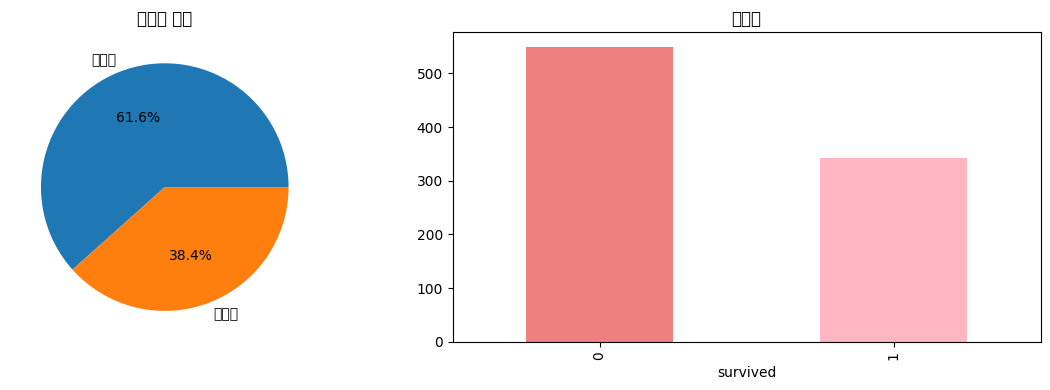

In [ ]:
# 2. 생존률 기본 분석
from matplotlib import axes


print('--- 2. 생존률 기본 분석---')
seurvival_rate = titanic['survived'].mean()
print(f'전체 생존율: {seurvival_rate:.1%}')

# 생존자/사망자 분포
dead, survivor = titanic['survived'].value_counts()
print(f'생존자:{survivor}, 사망자:{dead}')

# 시각화 
fig, axes = plt.subplots(1,2, figsize=(12,4))

a1, a2 = axes

# 사망 / 생존자 파이 그래프 
s_counts = titanic['survived'].value_counts()
a1.pie(s_counts, labels=('사망자','생존자'), autopct='%1.1f%%')
a1.set_title('생존자 비율')

# 생존자 막대그래프 
s_counts.plot(kind ='bar', ax=a2, color=['lightcoral','lightpink'])
a2.set_title('생존자 수')
a2.set_xlabel('생존여부(0: 사망, 1: 생존)')
a2.set_ylabel('인원 수')
a2.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [7]:
print("=== EDA 가설 및 우선순위 ===")

print("""
주요 가설들:
1. 여성과 어린이 우선 구조 정책 -> 성별과 나이가 생존에 중요한 영향
2. 상류층 우대 구조 -> 객실 등급(pclass)
3.
4. 승선 위치 -> 항구별(Embarked) 생존율 차이 가능성
      
분석 우선순위:
1순위 : pclass, sex, age
2순위 : sibsp, parch, fare
 3tnsdnl : embarked (부가 정보)
      """)



=== EDA 가설 및 우선순위 ===

주요 가설들:
1. 여성과 어린이 우선 구조 정책 -> 성별과 나이가 생존에 중요한 영향
2. 상류층 우대 구조 -> 객실 등급(pclass)
3.
4. 승선 위치 -> 항구별(Embarked) 생존율 차이 가능성
      
분석 우선순위:
1순위 : pclass, sex, age
2순위 : sibsp, parch, fare
 3tnsdnl : embarked (부가 정보)
      


In [ ]:
# 필요하다면 결측치/ 이상치를 처리 한다.



findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

=== 객실 등급별 생존율 ===
1 등급: 63.0% - 136 / 216명
2 등급: 47.3% - 87 / 184명
3 등급: 24.2% - 119 / 491명
=== 성별 생존율 ===
female: 74.2% - 233 / 314명
male: 18.9% - 109 / 577명


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

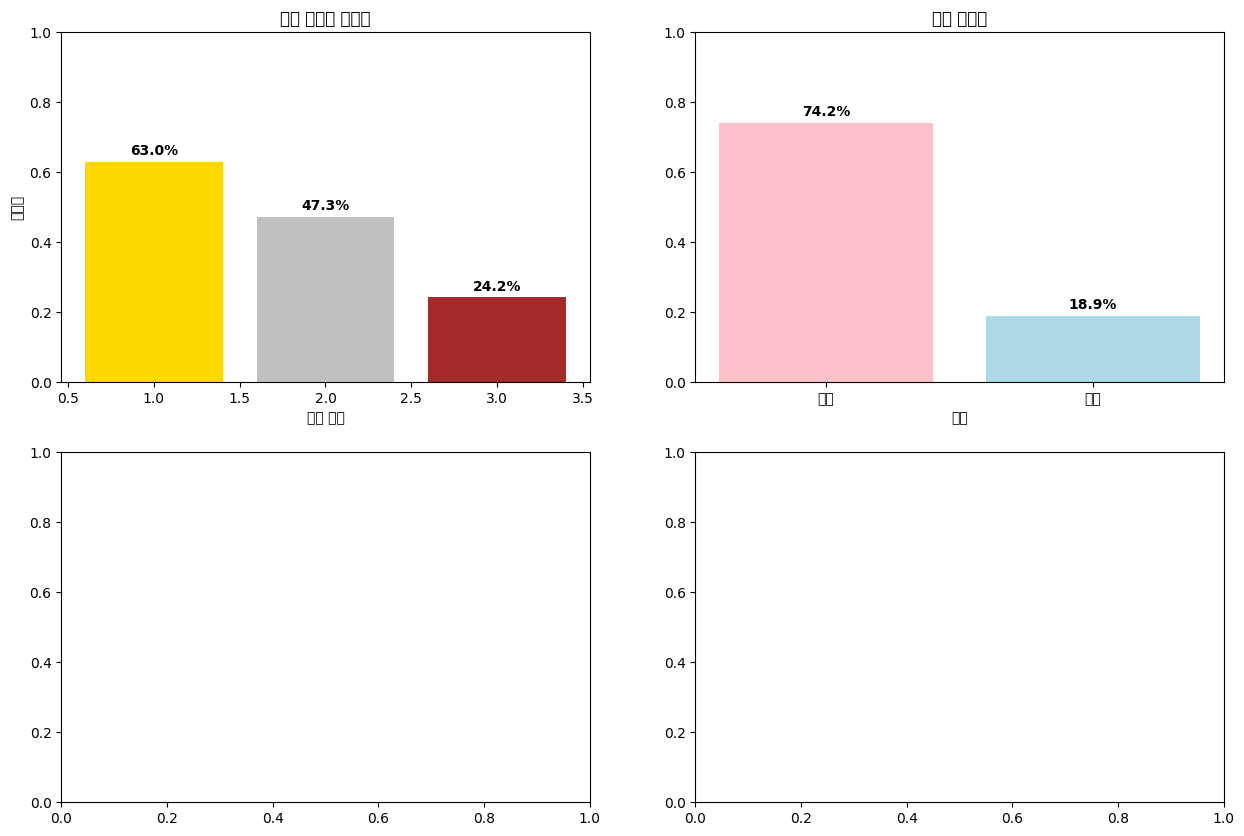

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

# 핵심 변수별 생존률 분석
# 1. 객실 등급별 생존률 (총원, 생존, 생존률)
pclass_survival = titanic.groupby('pclass')['survived'].agg(['count', 'sum', 'mean'])

a1.bar(pclass_survival.index, pclass_survival['mean'], color=['gold', 'silver', 'brown'])
a1.set_title('객실 등급별 생존율')
a1.set_xlabel('객실 등급')
a1.set_ylabel('생존율')
a1.set_ylim(0, 1)

for idx, value in enumerate(pclass_survival['mean']):
    #       x좌표,   y좌표
    a1.text(idx+1, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 객실 등급별 생존율 ===')
for idx, row in pclass_survival.iterrows():
    print(f"{idx} 등급: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명")


# 1-1. 요금으로 insight를 뽑을 수 있을까? (돈을 특히 많이 낸 사람들의 생존률..?)

# 2. 성별 생존률
sex_survival = titanic.groupby('sex')['survived'].agg(['count', 'sum', 'mean'])
a2.bar(range(len(sex_survival)), sex_survival['mean'], color=['pink', 'lightblue'])
a2.set_title('성별 생존율')
a2.set_xlabel('성별')
a2.set_xticklabels(['여성', '남성'])
a2.set_xticks(range(len(sex_survival)))
a2.set_ylim(0, 1)

for idx, value in enumerate(sex_survival['mean']):
    a2.text(idx, value + 0.02, f'{value:.1%}', ha='center', fontweight='bold')

print('=== 성별 생존율 ===')
for idx, row in sex_survival.iterrows():
    print(f"{idx}: {row['mean']:.1%} - {row['sum'].astype(int)} / {row['count'].astype(int)}명")

    # 나 파이썬 버전 낮아서 f스트링에 '_'가 아니라 "_"해야 오류가 안 나네 


# 3. 나이 생존률(연령대 별)

# 4. 조합 분석 : 성별 x 객실 등급
#                  성별     x      객실등급       x          생존             율
pd.crosstab(titanic['sex'],titanic['pclass'], titanic['survived'], aggfunc='mean' )
sns.heatmap(survival_ct, annot=True, fmt='.2f',cmap = 'RdylBu_r',
            
            
            )

print('===성별 x 객실등급 교차분석===')
print(survival_ct.round(3)*100)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency 

# 카이 제곱 독립성 검정
sex_survival_ct = pd.crosstab(titanic['sex'],titanic['survived'])
chi2, p_value, dof, expected = chi2_contingency(ser_survival_ct) 
""" 

chi2 = 카이제곱 통계량
p_value = 유의 확률 (값이 작다 -> 관련이 있다)
- 일반적으로 p_value가 5% 보다 작으면 연관이 있다고 봄

dof = 자유도(drgree of freedom)
expected = 기대빈도표 ( 성별-생존이 독립적일 때 기대되는 값들)
"""

print(p_value)
if p_value < 0.05:
    print('성별-생존율은 관련 있음')
else p_value 




NameError: name 'chi2' is not defined

In [ ]:
# 핵심 변수별 생존률 분석

# 1. 객실 등급별 생존률

# 1-1 요금으로 insight를 뽑을 수 있을까? (특히 돈을 많이 낸 사람들의 생존률)


In [ ]:
# 2. 성별 생존률



In [ ]:
# 3. 나이 생존률(연령대 별)


In [12]:
# 4. 조합 분석 : 성별 x 객실 등급 

In [ ]:
# 5. 분석 결과 보고 (인사이트 정리 )

강사님_코드